## Simulation of allele and genotypic frequency of decendency based on allele frequency. 
Simulation uses F1 allele frequency for prediction of genotypic and phenotypic frequencies based on a pseudo-random number generated from time, allowing different results to be obtained based on randomness and observed frequencies. 


## Simulation based on allele frequencies




### Static model: The same initial pairs keep on reproducing

In [ ]:
# Import the libraries 
import time
import random
import matplotlib.pyplot as plt
  
# Define starting allele frequencies
T_freq = 0.85
M_freq = 0.16

# Calculate genotype frequencies
TT_freq = T_freq ** 2
MM_freq = M_freq ** 2
MT_freq = 1 - TT_freq - MM_freq

# Calculate allele frequencies
T_allele_freq = T_freq + (MT_freq / 2)
M_allele_freq = M_freq + (MT_freq / 2)

# Define function to simulate offspring
def simulate_offspring(parents):
    offspring = {'TT': 0, 'MT': 0, 'MM': 0}
    for i in range(parents['TT']):
        random_num = random.random()
        if random_num < TT_freq:
            offspring['TT'] += 1
        elif random_num < TT_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MT']):
        random_num = random.random()
        if random_num < T_allele_freq:
            offspring['TT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MM']):
        random_num = random.random()
        if random_num < MM_freq:
            offspring['MM'] += 1
        elif random_num < MM_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['TT'] += 1
    return offspring

# Define function to update frequencies based on offspring
def update_frequencies(offspring):
    global TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    total_offspring = sum(offspring.values())
    TT_freq = offspring['TT'] / total_offspring
    MT_freq = offspring['MT'] / total_offspring
    MM_freq = offspring['MM'] / total_offspring
    T_allele_freq = TT_freq + (MT_freq / 2)
    M_allele_freq = MM_freq + (MT_freq / 2)
    
# Define function to simulate breeding cycles
def simulate_cycles(num_pairs, num_cycles):
    parents = {'TT': num_pairs, 'MT': 0, 'MM': 0}
    all_T_allele_freq = [T_allele_freq]
    all_M_allele_freq = [M_allele_freq]
    all_TT_freq = [TT_freq]
    all_MT_freq = [MT_freq]
    all_MM_freq = [MM_freq]
    offspring_counts = [parents.copy()]
    seed = int(time.time())
    for i in range(num_cycles):
        random.seed(seed)
        offspring = simulate_offspring(parents)
        update_frequencies(offspring)
        all_T_allele_freq.append(T_allele_freq)
        all_M_allele_freq.append(M_allele_freq)
        all_TT_freq.append(TT_freq)
        all_MT_freq.append(MT_freq)
        all_MM_freq.append(MM_freq)
        parents = offspring
        offspring_counts.append(parents.copy())
        seed += 1
    
    # Plot allelic frequency over time
    plt.plot(all_T_allele_freq, label="Alelo T")
    plt.plot(all_M_allele_freq, label="Alelo M")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia alélica")
    plt.legend()
    plt.show()

    # Plot genotypic frequency over time
    plt.plot(all_TT_freq, label="TT")
    plt.plot(all_MT_freq, label="MT")
    plt.plot(all_MM_freq, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia genotípica")
    plt.legend()
    plt.show()
    
    # Plot genotype counts over time
    TT_counts = [offspring['TT'] for offspring in offspring_counts]
    MT_counts = [offspring['MT'] for offspring in offspring_counts]
    MM_counts = [offspring['MM'] for offspring in offspring_counts]
    plt.plot(range(num_cycles + 1), TT_counts, label="TT")
    plt.plot(range(num_cycles + 1), MT_counts, label="MT")
    plt.plot(range(num_cycles + 1), MM_counts, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Número de animales")
    plt.legend()
    plt.show()

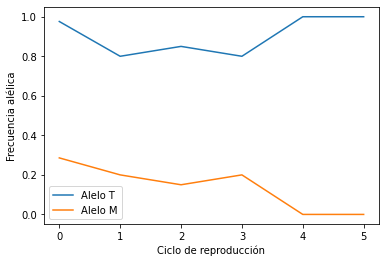

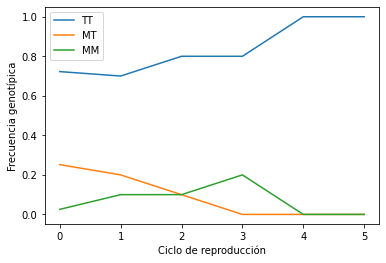

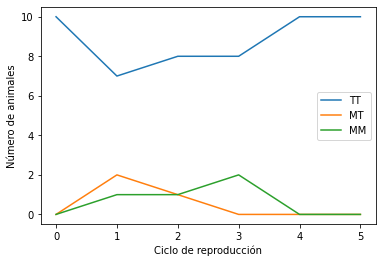

In [ ]:
# Call your function that uses random numbers here
simulate_cycles(num_pairs=10, num_cycles=5)

### Dynamic model: Outcrossing between progeny




In [ ]:
import time
import random
import matplotlib.pyplot as plt
    
# Define starting allele frequencies
T_freq = 0.85
M_freq = 0.16

# Calculate genotype frequencies
TT_freq = T_freq ** 2
MM_freq = M_freq ** 2
MT_freq = 1 - TT_freq - MM_freq

# Calculate allele frequencies
T_allele_freq = T_freq + (MT_freq / 2)
M_allele_freq = M_freq + (MT_freq / 2)

# Define function to simulate offspring
def simulate_offspring(parents):
    offspring = {'TT': 0, 'MT': 0, 'MM': 0}
    for i in range(parents['TT']):
        random_num = random.random()
        if random_num < TT_freq:
            offspring['TT'] += 1
        elif random_num < TT_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MT']):
        random_num = random.random()
        if random_num < T_allele_freq:
            offspring['TT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MM']):
        random_num = random.random()
        if random_num < MM_freq:
            offspring['MM'] += 1
        elif random_num < MM_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['TT'] += 1
    return offspring

# Define function to update frequencies based on offspring
def update_frequencies(offspring):
    global TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    total_offspring = sum(offspring.values())
    TT_freq = offspring['TT'] / total_offspring
    MT_freq = offspring['MT'] / total_offspring
    MM_freq = offspring['MM'] / total_offspring
    T_allele_freq = TT_freq + (MT_freq / 2)
    M_allele_freq = MM_freq + (MT_freq / 2)
    
# Define function to simulate breeding cycles
def simulate_cycles(num_pairs, num_cycles):
    global T_freq, M_freq, TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    parents = {'TT': num_pairs, 'MT': 0, 'MM': 0}
    all_T_allele_freq = [T_allele_freq]
    all_M_allele_freq = [M_allele_freq]
    all_TT_freq = [TT_freq]
    all_MT_freq = [MT_freq]
    all_MM_freq = [MM_freq]
    offspring_counts = [parents.copy()]
    seed = int(time.time())
    for i in range(num_cycles):
        random.seed(seed)
        offspring = simulate_offspring(parents)
        update_frequencies(offspring)
        all_T_allele_freq.append(T_allele_freq)
        all_M_allele_freq.append(M_allele_freq)
        all_TT_freq.append(TT_freq)
        all_MT_freq.append(MT_freq)
        all_MM_freq.append(MM_freq)
        parents = offspring
        offspring_counts.append(parents.copy())
        seed += 1
        T_freq = TT_freq + (MT_freq / 2)
        M_freq = MM_freq + (MT_freq / 2)
    
      # Plot allelic frequency over time
    plt.plot(all_T_allele_freq, label="Alelo T")
    plt.plot(all_M_allele_freq, label="Alelo M")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia alélica")
    plt.legend()
    plt.show()

    # Plot genotypic frequency over time
    plt.plot(all_TT_freq, label="TT")
    plt.plot(all_MT_freq, label="MT")
    plt.plot(all_MM_freq, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia genotípica")
    plt.legend()
    plt.show()
    
    # Plot genotype counts over time
    TT_counts = [offspring['TT'] for offspring in offspring_counts]
    MT_counts = [offspring['MT'] for offspring in offspring_counts]
    MM_counts = [offspring['MM'] for offspring in offspring_counts]
    plt.plot(range(num_cycles + 1), TT_counts, label="TT")
    plt.plot(range(num_cycles + 1), MT_counts, label="MT")
    plt.plot(range(num_cycles + 1), MM_counts, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Número de animales")
    plt.legend()
    plt.show()

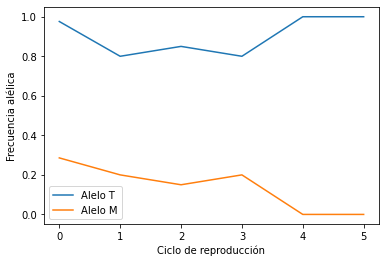

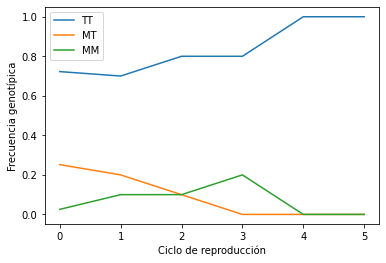

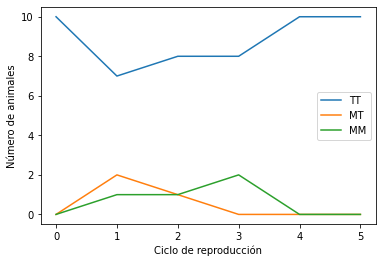

In [ ]:
# Call your function that uses random numbers here
simulate_cycles(num_pairs=10, num_cycles=5)

## Simulation based on genotypes

### Static model: The same initial pairs keep on reproducing

In [ ]:
# Import the libraries 
import time
import random
import matplotlib.pyplot as plt

parents_genotypes = {'parent1': {'T': 1, 'M': 1},
                     'parent2': {'T': 2, 'M': 0.0}}
                     
T_freq = (parents_genotypes['parent1']['T'] * 0.5) * (parents_genotypes['parent2']['T'] * 0.5)
M_freq = (parents_genotypes['parent1']['M'] * 0.5) * (parents_genotypes['parent2']['M'] * 0.5)
MT_freq = 1 - TT_freq - MM_freq

# Calculate genotype frequencies
TT_freq = T_freq ** 2
MM_freq = M_freq ** 2
MT_freq = 1 - T_freq - M_freq

# Calculate allele frequencies
T_allele_freq = T_freq + (MT_freq / 2)
M_allele_freq = M_freq + (MT_freq / 2)

# Define function to simulate offspring
def simulate_offspring(parents):
    offspring = {'TT': 0, 'MT': 0, 'MM': 0}
    for i in range(parents['TT']):
        random_num = random.random()
        if random_num < TT_freq:
            offspring['TT'] += 1
        elif random_num < TT_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MT']):
        random_num = random.random()
        if random_num < T_allele_freq:
            offspring['TT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MM']):
        random_num = random.random()
        if random_num < MM_freq:
            offspring['MM'] += 1
        elif random_num < MM_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['TT'] += 1
    return offspring

# Define function to update frequencies based on offspring
def update_frequencies(offspring):
    global TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    total_offspring = sum(offspring.values())
    TT_freq = offspring['TT'] / total_offspring
    MT_freq = offspring['MT'] / total_offspring
    MM_freq = offspring['MM'] / total_offspring
    T_allele_freq = TT_freq + (MT_freq / 2)
    M_allele_freq = MM_freq + (MT_freq / 2)
    
# Define function to simulate breeding cycles
def simulate_cycles(num_pairs, num_cycles):
    parents = {'TT': num_pairs, 'MT': 0, 'MM': 0}
    all_T_allele_freq = [T_allele_freq]
    all_M_allele_freq = [M_allele_freq]
    all_TT_freq = [TT_freq]
    all_MT_freq = [MT_freq]
    all_MM_freq = [MM_freq]
    offspring_counts = [parents.copy()]
    seed = int(time.time())
    for i in range(num_cycles):
        random.seed(seed)
        offspring = simulate_offspring(parents)
        update_frequencies(offspring)
        all_T_allele_freq.append(T_allele_freq)
        all_M_allele_freq.append(M_allele_freq)
        all_TT_freq.append(TT_freq)
        all_MT_freq.append(MT_freq)
        all_MM_freq.append(MM_freq)
        parents = offspring
        offspring_counts.append(parents.copy())
        seed += 1
    
      # Plot allelic frequency over time
    plt.plot(all_T_allele_freq, label="Alelo T")
    plt.plot(all_M_allele_freq, label="Alelo M")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia alélica")
    plt.legend()
    plt.show()

    # Plot genotypic frequency over time
    plt.plot(all_TT_freq, label="TT")
    plt.plot(all_MT_freq, label="MT")
    plt.plot(all_MM_freq, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia genotípica")
    plt.legend()
    plt.show()
    
    # Plot genotype counts over time
    TT_counts = [offspring['TT'] for offspring in offspring_counts]
    MT_counts = [offspring['MT'] for offspring in offspring_counts]
    MM_counts = [offspring['MM'] for offspring in offspring_counts]
    plt.plot(range(num_cycles + 1), TT_counts, label="TT")
    plt.plot(range(num_cycles + 1), MT_counts, label="MT")
    plt.plot(range(num_cycles + 1), MM_counts, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Número de animales")
    plt.legend()
    plt.show()

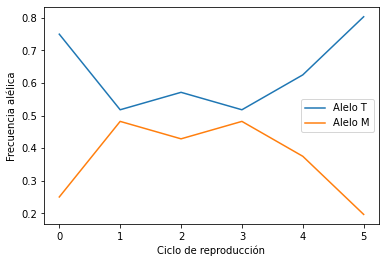

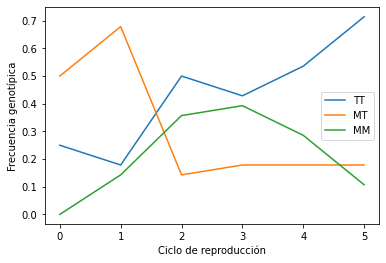

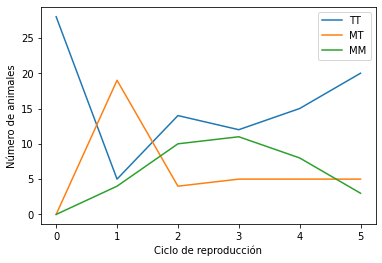

In [ ]:
# Call your function that uses random numbers here
simulate_cycles(num_pairs=28, num_cycles=5)

### Dynamic model: Outcrossing between progeny


In [ ]:
import time
import random
import matplotlib.pyplot as plt

parents_genotypes = {'parent1': {'T': 1, 'M': 1},
                     'parent2': {'T': 0, 'M': 2}}

TT_freq = (parents_genotypes['parent1']['T'] * 0.5) * (parents_genotypes['parent2']['T'] * 0.5)
MM_freq = (parents_genotypes['parent1']['M'] * 0.5) * (parents_genotypes['parent2']['M'] * 0.5)
MT_freq = 1 - TT_freq - MM_freq

# Calculate allele frequencies
T_allele_freq = T_freq + (MT_freq / 2)
M_allele_freq = M_freq + (MT_freq / 2)

# Define function to simulate offspring
def simulate_offspring(parents):
    offspring = {'TT': 0, 'MT': 0, 'MM': 0}
    for i in range(parents['TT']):
        random_num = random.random()
        if random_num < TT_freq:
            offspring['TT'] += 1
        elif random_num < TT_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MT']):
        random_num = random.random()
        if random_num < T_allele_freq:
            offspring['TT'] += 1
        else:
            offspring['MM'] += 1
    for i in range(parents['MM']):
        random_num = random.random()
        if random_num < MM_freq:
            offspring['MM'] += 1
        elif random_num < MM_freq + MT_freq:
            offspring['MT'] += 1
        else:
            offspring['TT'] += 1
    return offspring

# Define function to update frequencies based on offspring
def update_frequencies(offspring):
    global TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    total_offspring = sum(offspring.values())
    TT_freq = offspring['TT'] / total_offspring
    MT_freq = offspring['MT'] / total_offspring
    MM_freq = offspring['MM'] / total_offspring
    T_allele_freq = TT_freq + (MT_freq / 2)
    M_allele_freq = MM_freq + (MT_freq / 2)
    
# Define function to simulate breeding cycles
def simulate_cycles(num_pairs, num_cycles):
    global T_freq, M_freq, TT_freq, MT_freq, MM_freq, T_allele_freq, M_allele_freq
    parents = {'TT': num_pairs, 'MT': 0, 'MM': 0}
    all_T_allele_freq = [T_allele_freq]
    all_M_allele_freq = [M_allele_freq]
    all_TT_freq = [TT_freq]
    all_MT_freq = [MT_freq]
    all_MM_freq = [MM_freq]
    offspring_counts = [parents.copy()]
    seed = int(time.time())
    for i in range(num_cycles):
        random.seed(seed)
        offspring = simulate_offspring(parents)
        update_frequencies(offspring)
        all_T_allele_freq.append(T_allele_freq)
        all_M_allele_freq.append(M_allele_freq)
        all_TT_freq.append(TT_freq)
        all_MT_freq.append(MT_freq)
        all_MM_freq.append(MM_freq)
        parents = offspring
        offspring_counts.append(parents.copy())
        seed += 1
        T_freq = TT_freq + (MT_freq / 2)
        M_freq = MM_freq + (MT_freq / 2)
    
   # Plot allelic frequency over time
    plt.plot(all_T_allele_freq, label="Alelo T")
    plt.plot(all_M_allele_freq, label="Alelo M")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia alélica")
    plt.legend()
    plt.show()

    # Plot genotypic frequency over time
    plt.plot(all_TT_freq, label="TT")
    plt.plot(all_MT_freq, label="MT")
    plt.plot(all_MM_freq, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Frecuencia genotípica")
    plt.legend()
    plt.show()
    
    # Plot genotype counts over time
    TT_counts = [offspring['TT'] for offspring in offspring_counts]
    MT_counts = [offspring['MT'] for offspring in offspring_counts]
    MM_counts = [offspring['MM'] for offspring in offspring_counts]
    plt.plot(range(num_cycles + 1), TT_counts, label="TT")
    plt.plot(range(num_cycles + 1), MT_counts, label="MT")
    plt.plot(range(num_cycles + 1), MM_counts, label="MM")
    plt.xlabel("Ciclo de reproducción")
    plt.ylabel("Número de animales")
    plt.legend()
    plt.show()

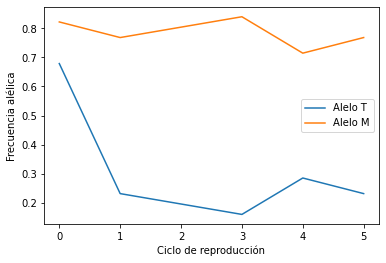

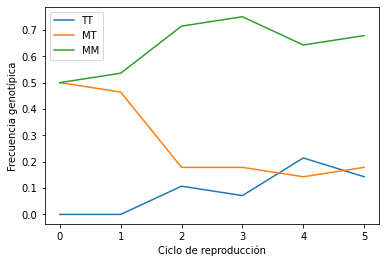

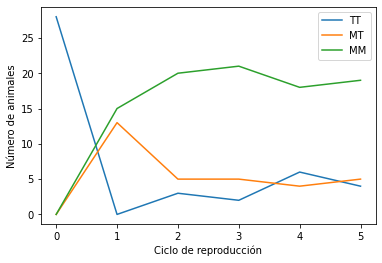

In [ ]:
# Call your function that uses random numbers here
simulate_cycles(num_pairs=28, num_cycles=5)